<a href="https://colab.research.google.com/github/vanithakattumuri/PAMI/blob/main/notebooks/extras/dataframeToDatabase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Converting the DataFrame into a different Databases
> Illustration with 5-year nation-wide air pollution data of Japan


## Introduction

*   A transactional database is a collection of transactions. Every transaction constitutes of a transaction-identifier (TID) and a set of items.

*   A temporal database is a collection of transactions ordered by their timestamp.

*   A timeseries represents an ordered collection of values of an event (or item) over time. A multiple timeseries represents the collection of multiple timeseries gathered from multiple items over a particular duration.

*   A utility transactional database consists of a transactional identifier (tid), items, and their corresponding utility values in a transaction.

*   We use the 5-year nation-wide air pollution (PM2.5) data of Japan for illustration purposes.

### Step 1: Download the air pollution dataset [1]

In [1]:
!wget https://www.dropbox.com/s/wa8d1sujzlx56hh/ETL_DATA_new.csv

--2023-08-17 12:05:15--  https://www.dropbox.com/s/wa8d1sujzlx56hh/ETL_DATA_new.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/wa8d1sujzlx56hh/ETL_DATA_new.csv [following]
--2023-08-17 12:05:16--  https://www.dropbox.com/s/raw/wa8d1sujzlx56hh/ETL_DATA_new.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0c80d61396b169e666d1882bb5.dl.dropboxusercontent.com/cd/0/inline/CB_xtgl7QSOt0m4P-Iw8QfAWHlOi1pZuvY_UTwsa8UcBQ0NNB_XJ4oKVCC96DyPxjm8jwVTRqGewxww2wPG7CrHjxoJFwLeq0osYIxFuHe_NCQui5H4_LRSBlGQcESy1QZqjgcay5ccQgzfUVcoSo7ZA/file# [following]
--2023-08-17 12:05:17--  https://uc0c80d61396b169e666d1882bb5.dl.dropboxusercontent.com/cd/0/inline/CB_xtgl7QSOt0m4P-Iw8QfAWHlOi1pZuvY_UTwsa8UcBQ0NNB_XJ4oKVCC96DyPxjm8jwVTRqGewxww2wPG7CrH

### Step 2: Read the dataset and analyze it

In [2]:
import pandas as pd
dataset = pd.read_csv('ETL_DATA_new.csv', index_col=0)

dataset
# you can notice that dataset is collected from 2018-01-01 01:00:00 hours to 2023-04-25 22:00:00 hours (5+ years)

TimeStamp  Point(139.0794379 36.3727776)  \
                                                            
0      2018-01-01 01:00:00                            NaN   
1      2018-01-01 02:00:00                            NaN   
2      2018-01-01 03:00:00                            NaN   
3      2018-01-01 04:00:00                            NaN   
4      2018-01-01 05:00:00                            NaN   
...                    ...                            ...   
46000  2023-04-25 18:00:00                            NaN   
46001  2023-04-25 19:00:00                            NaN   
46002  2023-04-25 20:00:00                            NaN   
46003  2023-04-25 21:00:00                            NaN   
46004  2023-04-25 22:00:00                            NaN   

       Point(139.1051411 36.3963822)  Point(139.0960211 36.4047323)  \
                                                                      
0                                NaN                            5.0   
1                                NaN                           11.0   
2                                NaN                            7.0   
3                                NaN                            5.0   
4                                NaN                            6.0   
...                              ...                            ...   
46000                            NaN                            NaN   
46001                            NaN                            NaN   
46002                            NaN                            NaN   
46003                            NaN                            NaN   
46004                            NaN                            NaN   

       Point(139.0428727 36.3816035)  Point(138.9955116 36.33801589999999)  \
                                                                             
0                               13.0                                  18.0   
1                               12.0                                  22.0   
2                               12.0                                  19.0   
3                               11.0                                  16.0   
4                               11.0                                  10.0   
...                              ...                                   ...   
46000                           22.0                                   3.0   
46001                           21.0                                   2.0   
46002                           20.0                                  10.0   
46003                           19.0                                   2.0   
46004                           19.0                                   1.0   

       Point(139.342672 36.4105658)  Point(139.3526243 36.3695416)  \
                                                                     
0                              20.0                            NaN   
1                              15.0                            NaN   
2                              16.0                            NaN   
3                              11.0                            NaN   
4                               8.0                            NaN   
...                             ...                            ...   
46000                          15.0                            NaN   
46001                          19.0                            NaN   
46002                          19.0                            NaN   
46003                          15.0                            NaN   
46004                          17.0                            NaN   

       Point(139.1945766 36.31351160000001)  Point(139.2076974 36.3034767)  \
                                                                             
0                                       NaN                            NaN   
1                                       NaN                            NaN   
2                                       NaN                  

__Format of the dataset:__ timestamp _tabSpace_ sensorLocation1 _tabSpace_ sensorLocation2 _tabSpace_ ... _tabSpace_ sensorLocation

### Step 3: Preprocessing the dataset


#### Step 3.1: Removing the timestamp column

In [3]:
dataset.drop('TimeStamp', inplace=True, axis=1)
dataset

Point(139.0794379 36.3727776)  Point(139.1051411 36.3963822)  \
                                                                      
0                                NaN                            NaN   
1                                NaN                            NaN   
2                                NaN                            NaN   
3                                NaN                            NaN   
4                                NaN                            NaN   
...                              ...                            ...   
46000                            NaN                            NaN   
46001                            NaN                            NaN   
46002                            NaN                            NaN   
46003                            NaN                            NaN   
46004                            NaN                            NaN   

       Point(139.0960211 36.4047323)  Point(139.0428727 36.3816035)  \
                                                                      
0                                5.0                           13.0   
1                               11.0                           12.0   
2                                7.0                           12.0   
3                                5.0                           11.0   
4                                6.0                           11.0   
...                              ...                            ...   
46000                            NaN                           22.0   
46001                            NaN                           21.0   
46002                            NaN                           20.0   
46003                            NaN                           19.0   
46004                            NaN                           19.0   

       Point(138.9955116 36.33801589999999)  Point(139.342672 36.4105658)  \
                                                                            
0                                      18.0                          20.0   
1                                      22.0                          15.0   
2                                      19.0                          16.0   
3                                      16.0                          11.0   
4                                      10.0                           8.0   
...                                     ...                           ...   
46000                                   3.0                          15.0   
46001                                   2.0                          19.0   
46002                                  10.0                          19.0   
46003                                   2.0                          15.0   
46004                                   1.0                          17.0   

       Point(139.3526243 36.3695416)  Point(139.1945766 36.31351160000001)  \
                                                                             
0                                NaN                                   NaN   
1                                NaN                                   NaN   
2                                NaN                                   NaN   
3                                NaN                                   NaN   
4                                NaN                                   NaN   
...                              ...                                   ...   
46000                            NaN                                   NaN   
46001                            NaN                                   NaN   
46002                            NaN                                   NaN   
46003                            NaN                                   NaN   
46004                            NaN                                   NaN   

       Point(139.2076974 36.3034767)  Point(139.3817322 36.2909131)  ...  \
                                                                  

#### Step 3.2: Removing Sensors that do not have Point information

In [4]:
sensorsWithPointInformation = [col for col in dataset if 'Unnamed' in col]
dataset.drop(columns=sensorsWithPointInformation, inplace=True, axis=1)
dataset.head()

Point(139.0794379 36.3727776)  Point(139.1051411 36.3963822)  \
                                                                  
0                            NaN                            NaN   
1                            NaN                            NaN   
2                            NaN                            NaN   
3                            NaN                            NaN   
4                            NaN                            NaN   

   Point(139.0960211 36.4047323)  Point(139.0428727 36.3816035)  \
                                                                  
0                            5.0                           13.0   
1                           11.0                           12.0   
2                            7.0                           12.0   
3                            5.0                           11.0   
4                            6.0                           11.0   

   Point(138.9955116 36.33801589999999)  Point(139.342672 36.4105658)  \
                                                                        
0                                  18.0                          20.0   
1                                  22.0                          15.0   
2                                  19.0                          16.0   
3                                  16.0                          11.0   
4                                  10.0                           8.0   

   Point(139.3526243 36.3695416)  Point(139.1945766 36.31351160000001)  \
                                                                         
0                            NaN                                   NaN   
1                            NaN                                   NaN   
2                            NaN                                   NaN   
3                            NaN                                   NaN   
4                            NaN                                   NaN   

   Point(139.2076974 36.3034767)  Point(139.3817322 36.2909131)  ...  \
                                                                 ...   
0                            NaN                           23.0  ...   
1                            NaN                           32.0  ...   
2                            NaN                           32.0  ...   
3                            NaN                           28.0  ...   
4                            NaN                           27.0  ...   

   Point(139.9239959 36.8062129)  Point(139.9418164 36.7656467)  \
                                                                  
0                            1.0                            NaN   
1                            0.0                            NaN   
2                            2.0                            NaN   
3                            3.0                            NaN   
4                            5.0                            NaN   

   Point(140.0549894 36.9688923)  Point(139.8775674 36.3847082)  \
                                                                  
0                            NaN                            NaN   
1                            6.0                            NaN   
2                            0.0                            NaN   
3                            2.0                            NaN   
4                            4.0                            NaN   

   Point(139.9101767 36.4393022)  Point(139.9074816 36.4445767)  \
                                                                  
0                            NaN                            NaN   
1                            NaN                            NaN   
2                            NaN                            NaN   
3                            NaN                            NaN   
4                            NaN                            NaN   

   Point(140.0934838 36.4673588)  Point(139.7422865 36.2305774)  \
                                                  

#### Step 3.3: Fillup the missing values (NaN) with zero

In [5]:
dataset = dataset.fillna(0)
dataset.head()

Point(139.0794379 36.3727776)  Point(139.1051411 36.3963822)  \
                                                                  
0                            0.0                            0.0   
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            0.0                            0.0   
4                            0.0                            0.0   

   Point(139.0960211 36.4047323)  Point(139.0428727 36.3816035)  \
                                                                  
0                            5.0                           13.0   
1                           11.0                           12.0   
2                            7.0                           12.0   
3                            5.0                           11.0   
4                            6.0                           11.0   

   Point(138.9955116 36.33801589999999)  Point(139.342672 36.4105658)  \
                                                                        
0                                  18.0                          20.0   
1                                  22.0                          15.0   
2                                  19.0                          16.0   
3                                  16.0                          11.0   
4                                  10.0                           8.0   

   Point(139.3526243 36.3695416)  Point(139.1945766 36.31351160000001)  \
                                                                         
0                            0.0                                   0.0   
1                            0.0                                   0.0   
2                            0.0                                   0.0   
3                            0.0                                   0.0   
4                            0.0                                   0.0   

   Point(139.2076974 36.3034767)  Point(139.3817322 36.2909131)  ...  \
                                                                 ...   
0                            0.0                           23.0  ...   
1                            0.0                           32.0  ...   
2                            0.0                           32.0  ...   
3                            0.0                           28.0  ...   
4                            0.0                           27.0  ...   

   Point(139.9239959 36.8062129)  Point(139.9418164 36.7656467)  \
                                                                  
0                            1.0                            0.0   
1                            0.0                            0.0   
2                            2.0                            0.0   
3                            3.0                            0.0   
4                            5.0                            0.0   

   Point(140.0549894 36.9688923)  Point(139.8775674 36.3847082)  \
                                                                  
0                            0.0                            0.0   
1                            6.0                            0.0   
2                            0.0                            0.0   
3                            2.0                            0.0   
4                            4.0                            0.0   

   Point(139.9101767 36.4393022)  Point(139.9074816 36.4445767)  \
                                                                  
0                            0.0                            0.0   
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            0.0                            0.0   
4                            0.0                            0.0   

   Point(140.0934838 36.4673588)  Point(139.7422865 36.2305774)  \
                                                  

#### Step 3.3: Removing abnormal values in the data

##### Step 3.3.1: Finding the maximum values recorded by each sensor

In [6]:
maxValueInEachColumn = dataset.max() #Gathering the maximum PM2.5 value recorded by each sensor
maxValueInEachColumn      #Printing the maxValue of each sensor

Point(139.0794379 36.3727776)             0.0
Point(139.1051411 36.3963822)             0.0
Point(139.0960211 36.4047323)           110.0
Point(139.0428727 36.3816035)            77.0
Point(138.9955116 36.33801589999999)    200.0
                                        ...  
Point(139.9074816 36.4445767)             0.0
Point(140.0934838 36.4673588)           137.0
Point(139.7422865 36.2305774)             0.0
Point(139.7151723 36.822353)              0.0
Point(140.1510903 36.6598314)           165.0
Length: 1764, dtype: float64

<Axes: >

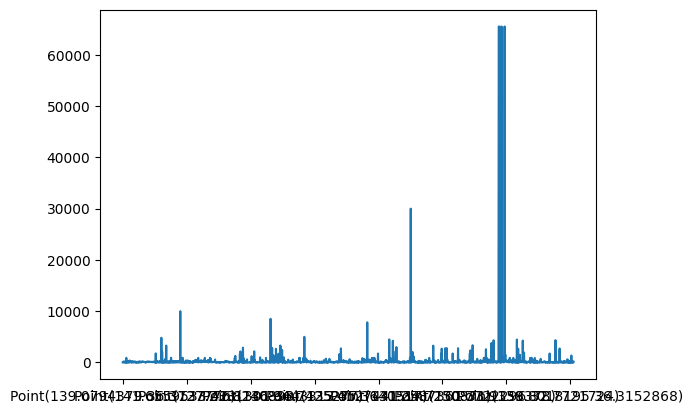

In [7]:
maxValueInEachColumn.plot()  #point the maximum values recorded by each sensor.

__Observation:__ we can see many sensors have recorded high PM2.5 values greater than 250. Such values are generally outliers/abnormalities and are not useful for the analysis.

##### Step 3.3.2: Replacing the values greater than 250 to zero.

<Axes: >

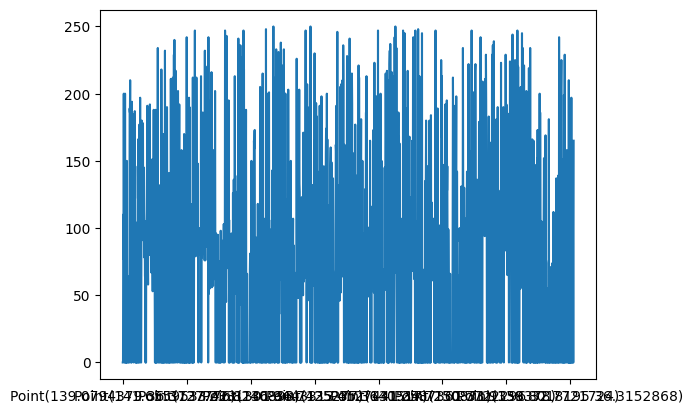

In [8]:
dataset.where(dataset <= 250, 0, inplace=True)
dataset.max().plot()

__Observation:__ We can notice that the maximum values of every sensor are no more than the 250 value.


##### Step 3.3.3: Finding the minimum values recorded by each sensor

<Axes: >

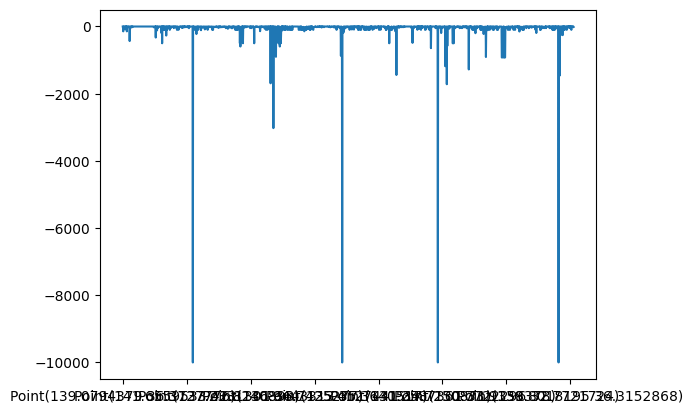

In [9]:
minValueInEachColumn = dataset.min() #Reading the minimum PM2.5 value recorded by each sensor
minValueInEachColumn.plot()  #ploting them

#dataset.min().plot()      #memory efficient approach

__Observation:__ We can observe that many sensors have recorded negative PM2.5 values. Thus, we replace the negative PM2.5 values of each sensor with Zero.

##### Step 3.3.4: Replacing the values less than zero to 0

<Axes: >

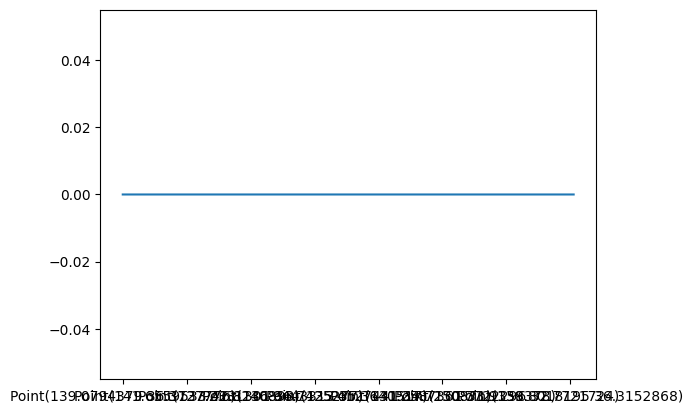

In [10]:
dataset.where(dataset > 0, 0, inplace=True)
dataset.min().plot()

__Observation:__ The abnormal values were replaced to 0.

#### Step 3.4:  Create a dataframe of the sensors having pm25 >= 15
(useful to prune those sensors that do not record any pm2.5 value)

In [11]:
thresholdValue = 15
pm25 = pd.DataFrame(columns=["long", "lat", "pm25"])
for col in dataset[1:]:
    res = [i for i in dataset[col].values if i >= thresholdValue]
    if len(res) == 0 or col == "Unnamed":
        dataset = dataset.drop([col], axis = 1)
    else:
        if "Poi" in col:
            #print("Hey")
            col = col.strip("Point()")
            col = col.rstrip(").1")
            long, lat = col.split()
            pm25 = pm25._append({'long': float(long), 'lat': float(lat), 'pm25': len(res)}, ignore_index=True)
pm25.head()

long        lat     pm25
0  139.096021  36.404732   8204.0
1  139.042873  36.381603   8999.0
2  138.995512  36.338016  13929.0
3  139.342672  36.410566  12667.0
4  139.381732  36.290913  10391.0

#### Step 3.5: Drawing the frequency heatmap of sensors

*   List item

*   List item

---



---


*   List item


*   List item



The frequency heatmap provides cruical information regarding how frequently a particular sensor has recorded harmful levels of pollution

In [12]:
import pandas as pd
import plotly.express as px

fig = px.density_mapbox(pm25, lat = 'lat', lon = 'long', z = 'pm25',
                        radius = 8,
                        zoom = 6,
                        mapbox_style = 'open-street-map')
fig.show()

__Inference from the above figure:__  High PM2.5 levels were frequently observed at the south part of Japan, starting from Tokyo.  

#### Step 3.6: Printing the heat map of maximum PM2.5 value recorded by each sensor

In [13]:
maxPM25 = pd.DataFrame(columns=["long", "lat", "maxPM25"])
for col in dataset[1:]:
    res = [i for i in dataset[col].values if i >= 15]
    if len(res) == 0 or col == "Unnamed":
        dataset = dataset.drop([col], axis = 1)
    else:
        if "Poi" in col:
            col = col.strip("Point()")
            col = col.rstrip(").1")
            long, lat = col.split()
            maxPM25 = maxPM25._append({'long': float(long), 'lat': float(lat), 'maxPM25': max(res)}, ignore_index=True)
maxPM25.head()

import pandas as pd
import plotly.express as px

fig = px.density_mapbox(maxPM25, lat = 'lat', lon = 'long', z = 'maxPM25',
                        radius = 8,
                        zoom = 6,
                        mapbox_style = 'open-street-map')
fig.show()

### Step 4: Installing the latest version of PAMI package

In [14]:
!pip install -U pami

### Step 5: Converting the data frame into a transactional database

In [15]:
from PAMI.extras.DF2DB import DenseFormatDF as db
obj = db.DenseFormatDF(dataset, '>=', 35)
obj.createTransactional('PM24HeavyPollutionRecordingSensors.csv')
!head -1 'PM24HeavyPollutionRecordingSensors.csv'


Point(139.750635 35.7977241)	Point(139.8841693 35.8422674)	Point(139.3819898 36.2229999)	Point(139.9206727 35.684037)	Point(139.9785953 35.6880639)	Point(139.9033705 35.7876179)	Point(139.9123927 35.7995549)	Point(139.880097 35.953403)	Point(139.9035901 35.8570293)	Point(139.9012134 35.6552406)	Point(139.8356927 35.6967785)	Point(139.7209595 35.6108138)	Point(139.7054233 35.7609043)	Point(139.8257782 35.7697167)	Point(139.8045157 35.77453510000001)	Point(139.8692678 35.7864558)	Point(139.8530976 35.7608755)	Point(139.8773135 35.6821907)	Point(137.1418898 34.9626945)	Point(136.8905668 35.0122987)	Point(136.6548337 35.0051925)	Point(139.4949175 36.2914457)


### Step 6: Converting the data frame into a temporal database

In [16]:
from PAMI.extras.DF2DB import DenseFormatDF as db
obj = db.DenseFormatDF(dataset, '>=', 35)
obj.createTemporal('PM24HeavyPollutionRecordingSensors.csv')
!head -1 'PM24HeavyPollutionRecordingSensors.csv'


0	Point(139.750635 35.7977241)	Point(139.8841693 35.8422674)	Point(139.3819898 36.2229999)	Point(139.9206727 35.684037)	Point(139.9785953 35.6880639)	Point(139.9033705 35.7876179)	Point(139.9123927 35.7995549)	Point(139.880097 35.953403)	Point(139.9035901 35.8570293)	Point(139.9012134 35.6552406)	Point(139.8356927 35.6967785)	Point(139.7209595 35.6108138)	Point(139.7054233 35.7609043)	Point(139.8257782 35.7697167)	Point(139.8045157 35.77453510000001)	Point(139.8692678 35.7864558)	Point(139.8530976 35.7608755)	Point(139.8773135 35.6821907)	Point(137.1418898 34.9626945)	Point(136.8905668 35.0122987)	Point(136.6548337 35.0051925)	Point(139.4949175 36.2914457)


### Step 7: Converting the data frame into a multiple time series database

In [17]:
from PAMI.extras.DF2DB import DenseFormatDF as db
obj = db.DenseFormatDF(dataset, '>=', 35)
obj.createMultipleTimeSeries(2, 'PM24HeavyPollutionRecordingSensors.csv')
!head -1 'PM24HeavyPollutionRecordingSensors.csv'

1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	2	2	2	2	2	2	2	2	2	2	2	2	2	2	2	2	2	2	2	2	2	2	2	2	2	2	2	2	:Point(139.750635 35.7977241)	Point(139.8841693 35.8422674)	Point(139.3819898 36.2229999)	Point(139.9206727 35.684037)	Point(139.9785953 35.6880639)	Point(139.9033705 35.7876179)	Point(139.9123927 35.7995549)	Point(139.880097 35.953403)	Point(139.9035901 35.8570293)	Point(139.9012134 35.6552406)	Point(139.8356927 35.6967785)	Point(139.7209595 35.6108138)	Point(139.7054233 35.7609043)	Point(139.8257782 35.7697167)	Point(139.8045157 35.77453510000001)	Point(139.8692678 35.7864558)	Point(139.8530976 35.7608755)	Point(139.8773135 35.6821907)	Point(137.1418898 34.9626945)	Point(136.8905668 35.0122987)	Point(136.6548337 35.0051925)	Point(139.4949175 36.2914457)	Point(139.7962265 35.8959041)	Point(139.8841693 35.8422674)	Point(139.3819898 36.2229999)	Point(139.9206727 35.684037)	Point(139.9785953 35.6880639)	Point(139.9033705 35.7876179)	Point(139.9123927 35.7995549)	Point(139.880097 35.953403)

### Step 8: Converting the data frame into a utility database

In [18]:
from PAMI.extras.DF2DB import DenseFormatDF as db
obj = db.DenseFormatDF(dataset, '>=', 35)
obj.createUtility('PM24HeavyPollutionRecordingSensors.csv')
!head -1 'PM24HeavyPollutionRecordingSensors.csv'

Point(139.0960211 36.4047323)	Point(139.0428727 36.3816035)	Point(138.9955116 36.33801589999999)	Point(139.342672 36.4105658)	Point(139.3817322 36.2909131)	Point(139.0432674 36.64710669999999)	Point(139.5317782 36.2499123)	Point(138.9940146 36.4990885)	Point(138.8939601 36.25898610000001)	Point(138.8275195 36.5786787)	Point(138.4937213 36.4836568)	Point(141.3532777 43.06225480000001).1	Point(141.3445286 43.0409769)	Point(141.3711567 43.1453261)	Point(141.3331053 43.0820313)	Point(141.3483898 43.0843826)	Point(141.3741522 43.1037853)	Point(141.4156654 43.0691627)	Point(141.396111 43.03045300000001)	Point(141.3548381 42.9626928)	Point(141.2890968 43.0877638)	Point(141.2459108 43.124975)	Point(141.4630875 43.04212950000001)	Point(141.4435827 42.99926180000001)	Point(139.7266446 35.9148962)	Point(139.4866332 35.8906262)	Point(139.4869977 35.9278059)	Point(139.426854 35.91932389999999)	Point(139.4926183 35.9065533)	Point(139.3886361 36.1473726)	Point(139.395017 36.163357)	Point(139.750635 3